# MACHINE LEARNING PROJECT

# Nam Pham - BS19BDS025

# INTRODUCTION

This project is about predicting house prices in Ho Chi Minh city, Vietnam. It was originally a real-life project that I was assigned to do during my internship in summer 2020. My roles for the project were only about data pre-processing and data analysis, so I never had to build models. Therefore, I have decided that I would finish what I started and make this a complete and proudly project of my own (this project is actually worth $100,000 by the time I was in charge). 

The data set is taken from multiple sources of real estate websites. The customers hold their real data and only agree to provide once the credible evidences are shown to prove that the predictive models work fine on sample sets.

# IMPORTANT NOTES

I will submit two parts of the project for you. The first one is all about data pre-processing using raw dataset. Since the original dataset is confidential according to the law of my old company, so it was no longer available for you to run the codes, but you can still see all the works that I myself have done by then. Fortunately, I'm still able to access to the cleaned dataset - sales data (I divided the original dataset into two subsets for lease and for sale, as you can see later on).

The second part will continue on where I have never had the chance to complete, which are data analysis and model building.

# PART 1

# Import libraries and objects we will use

In [1]:
from datetime import datetime as dt
from sklearn.base import TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
import mysql.connector
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re
%matplotlib inline
pd.plotting.register_matplotlib_converters()
%matplotlib inline

In [2]:
sns.set(style="ticks", color_codes=True)
mydb = mysql.connector.connect(host="172.16.0.232",user="openreal",passwd="Openreal@123",db="real_estate")
print(mydb)

# Explore the dataset further

In [5]:
df=pd.read_sql_query("SELECT * FROM preprocess_data",mydb)
print(df)

       ID_CLIENT    SITE                                           ADS_LINK  \
0       10003287  mogivn  https://mogi.vn/thi-xa-di-an/thue-nha-mat-tien...   
1       10003294  mogivn  https://mogi.vn/quan-go-vap/thue-nha-mat-tien-...   
2       10013903  mogivn  https://mogi.vn/quan-12/thue-nha-mat-tien-pho/...   
3       10029182  mogivn  https://mogi.vn/quan-hai-ba-trung/thue-phong-t...   
4       10238265  mogivn  https://mogi.vn/quan-binh-tan/thue-nha-hem-ngo...   
...          ...     ...                                                ...   
297949   9881980  mogivn  https://mogi.vn/quan-thanh-xuan/thue-mat-bang-...   
297950   9884914  mogivn  https://mogi.vn/quan-7/thue-nha-mat-tien-pho/c...   
297951   9890767  mogivn  https://mogi.vn/quan-5/thue-can-ho-chung-cu/ch...   
297952   9905418  mogivn  https://mogi.vn/quan-7/thue-can-ho-chung-cu/ch...   
297953   9925944  mogivn  https://mogi.vn/quan-tan-phu/thue-nha-mat-tien...   

        FOR_SALE  FOR_LEASE  TO_BUY  TO_LEASE  \
0 

In [6]:
#Create a dataframe from the data set
data = pd.DataFrame(df)
data

,ID_CLIENT,SITE,ADS_LINK,FOR_SALE,FOR_LEASE,TO_BUY,TO_LEASE,LAND_TYPE,ADS_DATE,PRICE,...,CL_FULL_ADDRESS,CL_STREET,CL_WARD,CL_DISTRICT,CL_CITY,CL_DEALER_TEL,CHECK_CONVERT,PRO_FLAG,CREATED_DATE,UPDATED_DATE
0,10003287,mogivn,https://mogi.vn/thi-xa-di-an/thue-nha-mat-tien...,0,1,0,0,thue-nha-mat-tien-pho,22/05/2018,15,...,"đường m,thị trấn dĩ an,thị xã dĩ an,bình dương",đường m,thị trấn dĩ an,thị xã dĩ an,bình dương,0975575198,2,12,None,None
1,10003294,mogivn,https://mogi.vn/quan-go-vap/thue-nha-mat-tien-...,0,1,0,0,thue-nha-mat-tien-pho,26/04/2020,22,...,"phan văn trị,phường 10,quận gò vấp,tphcm",phan văn trị,phường 10,quận gò vấp,tphcm,0374516561,2,12,None,None
2,10013903,mogivn,https://mogi.vn/quan-12/thue-nha-mat-tien-pho/...,0,1,0,0,thue-nha-mat-tien-pho,22/05/2018,35,...,"lê thị riêng,phường thới an,quận 12,tphcm",lê thị riêng,phường thới an,quận 12,tphcm,0967589307,2,12,None,None
3,10029182,mogivn,https://mogi.vn/quan-hai-ba-trung/thue-phong-t...,0,1,0,0,thue-phong-tro-khu-nha-tro,22/05/2018,2,...,"thanh nhàn,phường bạch mai,quận hai bà trưng,h...",thanh nhàn,phường bạch mai,quận hai bà trưng,hà nội,0989893675,2,12,None,None
4,10238265,mogivn,https://mogi.vn/quan-binh-tan/thue-nha-hem-ngo...,0,1,0,0,thue-nha-hem-ngo,25/06/2018,15,...,"đất mới,,quận bình tân,tphcm",đất mới,,quận bình tân,tphcm,0939837433,2,12,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297949,9881980,mogivn,https://mogi.vn/quan-thanh-xuan/thue-mat-bang-...,0,1,0,0,thue-mat-bang-cua-hang-shop-nhieu-muc-dich,22/05/2018,35,...,"khuất duy tiến,phường hạ đình,quận thanh xuân,...",khuất duy tiến,phường hạ đình,quận thanh xuân,hà nội,0976210190,2,12,None,None
297950,9884914,mogivn,https://mogi.vn/quan-7/thue-nha-mat-tien-pho/c...,0,1,0,0,thue-nha-mat-tien-pho,22/05/2018,45,...,"bùi bằng đoàn,phường tân phong,quận 7,tphcm",bùi bằng đoàn,phường tân phong,quận 7,tphcm,0383977728,2,12,None,None
297951,9890767,mogivn,https://mogi.vn/quan-5/thue-can-ho-chung-cu/ch...,0,1,0,0,thue-can-ho-chung-cu,22/05/2018,23,...,"hùng vương,,quận 5,tphcm",hùng vương,,quận 5,tphcm,0938101965,2,12,None,None
297952,9905418,mogivn,https://mogi.vn/quan-7/thue-can-ho-chung-cu/ch...,0,1,0,0,thue-can-ho-chung-cu,22/05/2018,12,...,"đường số 18,phường tân hưng,quận 7,tphcm",đường số 18,phường tân hưng,quận 7,tphcm,0909808461,2,12,None,None


In [7]:
print(data.columns)

Index(['ID_CLIENT', 'SITE', 'ADS_LINK', 'FOR_SALE', 'FOR_LEASE', 'TO_BUY',
       'TO_LEASE', 'LAND_TYPE', 'ADS_DATE', 'PRICE', 'PRICE_UNIT', 'PRICE_M2',
       'SURFACE', 'SURFACE_UNIT', 'USED_SURFACE', 'USED_SURFACE_UNIT',
       'PRO_WIDTH', 'PRO_LENGTH', 'LEGAL_STATUS', 'PRO_CURRENT_STATUS',
       'PRO_DIRECTION', 'FRONTAGE', 'ALLEY_ACCESS', 'NB_LOTS', 'PRO_UTILITIES',
       'NB_ROOMS', 'NB_FLOORS', 'KITCHEN', 'BEDROOM', 'BATHROOM', 'GARAGE',
       'TOILET', 'FULL_ADDRESS', 'STREET', 'WARD', 'DISTRICT', 'CITY', 'LAT',
       'LON', 'PHOTOS', 'ADS_TITLE', 'BRIEF', 'DETAILED_BRIEF', 'DEALER_ID',
       'DEALER_NAME', 'DEALER_TYPE', 'DEALER_ADDRESS', 'DEALER_EMAIL',
       'DEALER_TEL', 'DEALER_JOIN_DATE', 'PROJECT_NAME', 'AGENCY_NAME',
       'AGENCY_ADDRESS', 'AGENCY_CITY', 'AGENCY_TEL', 'AGENCY_WEBSITE',
       'MINI_SITE', 'CL_LAND_TYPE', 'CL_LEGAL_STATUS', 'CL_PRO_DIRECTION',
       'CL_ROAD_INFRONT_PROPERTY', 'CL_PRO_CURRENT_STATUS', 'CL_PRICE',
       'CL_SURFACE', 'CL_USED_

In [8]:
print(data.describe())

            FOR_SALE      FOR_LEASE    TO_BUY  TO_LEASE       PRICE_M2  \
count  297954.000000  297954.000000  297954.0  297954.0  297954.000000   
mean        0.360139       0.639861       0.0       0.0      56.662159   
std         0.480041       0.480041       0.0       0.0     817.435463   
min         0.000000       0.000000       0.0       0.0       0.000000   
25%         0.000000       0.000000       0.0       0.0       0.112903   
50%         0.000000       1.000000       0.0       0.0       0.232558   
75%         1.000000       1.000000       0.0       0.0      11.500000   
max         1.000000       1.000000       0.0       0.0  131250.000000   

       FRONTAGE  ALLEY_ACCESS   NB_LOTS        BEDROOM       BATHROOM  \
count  297954.0      297954.0  297954.0  297954.000000  297954.000000   
mean        0.0           0.0       0.0       3.859408       3.722612   
std         0.0           0.0       0.0       6.570593       6.557036   
min         0.0           0.0       0.0  

In [9]:
#Check the unique values of 'CITY' column
data.CITY.unique()

array(['bình dương', 'tphcm', 'hà nội', 'hà nội', 'hồ chí minh',
       'quận 9', 'cần thơ', 'quận tây hồ', 'long an', 'quận 7',
       'quận nam từ liêm', 'đồng nai', None, 'bà rịa vũng tàu',
       'quận ba đình', 'quận cầu giấy', 'hải phòng', 'quảng nam',
       'huyện bình chánh', 'khánh hòa', 'đà nẵng', 'quận bắc từ liêm',
       'quận 2', 'quận bình tân', 'quận hai bà trưng', 'quận hoàng mai',
       'hòa bình', 'quận đống đa', 'thái bình', 'bình định', 'bình phước',
       'huyện hoài đức', 'quảng ngãi', 'huyện bến lức', 'nghệ an',
       'quảng ninh', 'thái nguyên', 'huyện nhà bè', 'bình thuận',
       'kiên giang', 'hà tĩnh', 'quận hà đông', 'bắc ninh', 'phú yên',
       'huyện đồng xoài', 'thừa thiên huế', 'hà nam', 'bến tre',
       'thanh hóa', 'bắc giang', 'quận cái răng', 'quận 8',
       'huyện phú mỹ', 'huyện biên hòa', 'tiền giang', 'quận bình thạnh',
       'huyện yên mỹ', 'tây ninh', 'hải dương', 'lâm đồng',
       'huyện nha trang', 'vĩnh long', 'quận thanh xuân',

In [10]:
#Detect the number of false values in the CITY column regarding Ho Chi Minh city
data['CITY'][(data['CITY'] == 'quận 9')|(data['CITY'] == 'quận 8')|(data['CITY'] == 'quận 7')|(data['CITY'] == 'quận 2')|(data['CITY'] == 'quận bình tân')|(data['CITY'] == 'quận bình thạnh')|(data['CITY'] == 'huyện nhà bè')|(data['CITY'] == 'huyện bình chánh')].value_counts()

quận 7              15
huyện bình chánh     5
quận 9               5
huyện nhà bè         5
quận 8               5
quận 2               4
quận bình tân        3
quận bình thạnh      2
Name: CITY, dtype: int64

In [11]:
#Since these false values are insignificant to the data set in terms of evaluation, we only select values that are relevant to Ho Chi Minh city
hcm_data = data[(data['CITY'] == 'tphcm')|(data['CITY'] == 'hồ chí minh')]
hcm_data

,ID_CLIENT,SITE,ADS_LINK,FOR_SALE,FOR_LEASE,TO_BUY,TO_LEASE,LAND_TYPE,ADS_DATE,PRICE,...,CL_FULL_ADDRESS,CL_STREET,CL_WARD,CL_DISTRICT,CL_CITY,CL_DEALER_TEL,CHECK_CONVERT,PRO_FLAG,CREATED_DATE,UPDATED_DATE
1,10003294,mogivn,https://mogi.vn/quan-go-vap/thue-nha-mat-tien-...,0,1,0,0,thue-nha-mat-tien-pho,26/04/2020,22,...,"phan văn trị,phường 10,quận gò vấp,tphcm",phan văn trị,phường 10,quận gò vấp,tphcm,0374516561,2,12,None,None
2,10013903,mogivn,https://mogi.vn/quan-12/thue-nha-mat-tien-pho/...,0,1,0,0,thue-nha-mat-tien-pho,22/05/2018,35,...,"lê thị riêng,phường thới an,quận 12,tphcm",lê thị riêng,phường thới an,quận 12,tphcm,0967589307,2,12,None,None
4,10238265,mogivn,https://mogi.vn/quan-binh-tan/thue-nha-hem-ngo...,0,1,0,0,thue-nha-hem-ngo,25/06/2018,15,...,"đất mới,,quận bình tân,tphcm",đất mới,,quận bình tân,tphcm,0939837433,2,12,None,None
5,10238266,mogivn,https://mogi.vn/quan-binh-tan/thue-nha-hem-ngo...,0,1,0,0,thue-nha-hem-ngo,01/06/2018,9,...,"đường số 5,phường bình hưng hòa,quận bình tân,...",đường số 5,phường bình hưng hòa,quận bình tân,tphcm,0908575610,2,12,None,None
6,10238268,mogivn,https://mogi.vn/quan-binh-tan/thue-van-phong-n...,0,1,0,0,thue-van-phong-nha-rieng-can-ho,01/06/2018,12,...,"mã lò,,quận bình tân,tphcm",mã lò,,quận bình tân,tphcm,0908575610,2,12,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297948,9838289,mogivn,https://mogi.vn/quan-7/thue-nha-biet-thu-lien-...,0,1,0,0,thue-nha-biet-thu-lien-ke,27/09/2018,30,...,"đường số 22,phường tân phong,quận 7,tphcm",đường số 22,phường tân phong,quận 7,tphcm,0903187589,2,12,None,None
297950,9884914,mogivn,https://mogi.vn/quan-7/thue-nha-mat-tien-pho/c...,0,1,0,0,thue-nha-mat-tien-pho,22/05/2018,45,...,"bùi bằng đoàn,phường tân phong,quận 7,tphcm",bùi bằng đoàn,phường tân phong,quận 7,tphcm,0383977728,2,12,None,None
297951,9890767,mogivn,https://mogi.vn/quan-5/thue-can-ho-chung-cu/ch...,0,1,0,0,thue-can-ho-chung-cu,22/05/2018,23,...,"hùng vương,,quận 5,tphcm",hùng vương,,quận 5,tphcm,0938101965,2,12,None,None
297952,9905418,mogivn,https://mogi.vn/quan-7/thue-can-ho-chung-cu/ch...,0,1,0,0,thue-can-ho-chung-cu,22/05/2018,12,...,"đường số 18,phường tân hưng,quận 7,tphcm",đường số 18,phường tân hưng,quận 7,tphcm,0909808461,2,12,None,None


# Define a function that tells how many NA and their percentage in each column

In [12]:
def missing_values_table(df):
    # Percentage of missing values
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing value in descending order
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    # Print summary information
    print("\nThe Dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    return mis_val_table_ren_columns

In [13]:
missing_values_table(hcm_data)


The Dataframe has 75 columns.
There are 52 columns that have missing values.


,Missing Values,% of Total Values
DEALER_TYPE,253623,100.0
STREET,253623,100.0
CL_PRO_CURRENT_STATUS,253623,100.0
CL_ROAD_INFRONT_PROPERTY,253623,100.0
MINI_SITE,253623,100.0
AGENCY_WEBSITE,253623,100.0
AGENCY_TEL,253623,100.0
AGENCY_CITY,253623,100.0
AGENCY_ADDRESS,253623,100.0
AGENCY_NAME,253623,100.0


## Comment

It seems like there are a lot of columns with no values or just one unique value, we will drop all of these since they are not useful for data analysis

# Cleaning data by removing unneccessary null values

In [14]:
#Create a new dataset where all the null and irrelevant comlumns are dropped
hcm_data = hcm_data.drop(columns = ['DEALER_TYPE','CL_PRO_CURRENT_STATUS','CL_ROAD_INFRONT_PROPERTY','MINI_SITE','AGENCY_WEBSITE','AGENCY_TEL','AGENCY_CITY','AGENCY_ADDRESS','AGENCY_NAME','PROJECT_NAME','DEALER_EMAIL','DEALER_ADDRESS','BRIEF','UPDATED_DATE','KITCHEN','NB_FLOORS','PRO_WIDTH','PRO_LENGTH','PRO_CURRENT_STATUS','NB_ROOMS','PRO_UTILITIES','GARAGE','TOILET','ADS_LINK','SITE','ID_CLIENT','ADS_TITLE','USED_SURFACE_UNIT','SURFACE_UNIT','FRONTAGE','ALLEY_ACCESS', 'NB_LOTS','DETAILED_BRIEF','DEALER_ID', 'DEALER_NAME', 'DEALER_JOIN_DATE','TO_BUY','TO_LEASE','DEALER_TEL','CL_DEALER_TEL'])
hcm_data

,FOR_SALE,FOR_LEASE,LAND_TYPE,ADS_DATE,PRICE,PRICE_UNIT,PRICE_M2,SURFACE,USED_SURFACE,LEGAL_STATUS,...,CL_SURFACE,CL_USED_SURFACE,CL_FULL_ADDRESS,CL_STREET,CL_WARD,CL_DISTRICT,CL_CITY,CHECK_CONVERT,PRO_FLAG,CREATED_DATE
1,0,1,thue-nha-mat-tien-pho,26/04/2020,22,triệu,0.305556,72,None,không xác định,...,72.0,NaN,"phan văn trị,phường 10,quận gò vấp,tphcm",phan văn trị,phường 10,quận gò vấp,tphcm,2,12,None
2,0,1,thue-nha-mat-tien-pho,22/05/2018,35,triệu,0.134615,260,400,không xác định,...,260.0,400.0,"lê thị riêng,phường thới an,quận 12,tphcm",lê thị riêng,phường thới an,quận 12,tphcm,2,12,None
4,0,1,thue-nha-hem-ngo,25/06/2018,15,triệu,0.187500,80,120,không xác định,...,80.0,120.0,"đất mới,,quận bình tân,tphcm",đất mới,,quận bình tân,tphcm,2,12,None
5,0,1,thue-nha-hem-ngo,01/06/2018,9,triệu,0.112500,80,None,không xác định,...,80.0,NaN,"đường số 5,phường bình hưng hòa,quận bình tân,...",đường số 5,phường bình hưng hòa,quận bình tân,tphcm,2,12,None
6,0,1,thue-van-phong-nha-rieng-can-ho,01/06/2018,12,triệu,0.066667,180,180,không xác định,...,180.0,180.0,"mã lò,,quận bình tân,tphcm",mã lò,,quận bình tân,tphcm,2,12,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297948,0,1,thue-nha-biet-thu-lien-ke,27/09/2018,30,triệu,0.238095,126,400,không xác định,...,126.0,400.0,"đường số 22,phường tân phong,quận 7,tphcm",đường số 22,phường tân phong,quận 7,tphcm,2,12,None
297950,0,1,thue-nha-mat-tien-pho,22/05/2018,45,triệu,0.405405,111,None,không xác định,...,111.0,NaN,"bùi bằng đoàn,phường tân phong,quận 7,tphcm",bùi bằng đoàn,phường tân phong,quận 7,tphcm,2,12,None
297951,0,1,thue-can-ho-chung-cu,22/05/2018,23,triệu,0.174242,132,132,không xác định,...,132.0,132.0,"hùng vương,,quận 5,tphcm",hùng vương,,quận 5,tphcm,2,12,None
297952,0,1,thue-can-ho-chung-cu,22/05/2018,12,triệu,0.173913,69,69,không xác định,...,69.0,69.0,"đường số 18,phường tân hưng,quận 7,tphcm",đường số 18,phường tân hưng,quận 7,tphcm,2,12,None


In [15]:
#Check the remaining columns
print(hcm_data.columns)

Index(['FOR_SALE', 'FOR_LEASE', 'LAND_TYPE', 'ADS_DATE', 'PRICE', 'PRICE_UNIT',
       'PRICE_M2', 'SURFACE', 'USED_SURFACE', 'LEGAL_STATUS', 'PRO_DIRECTION',
       'BEDROOM', 'BATHROOM', 'FULL_ADDRESS', 'STREET', 'WARD', 'DISTRICT',
       'CITY', 'LAT', 'LON', 'PHOTOS', 'CL_LAND_TYPE', 'CL_LEGAL_STATUS',
       'CL_PRO_DIRECTION', 'CL_PRICE', 'CL_SURFACE', 'CL_USED_SURFACE',
       'CL_FULL_ADDRESS', 'CL_STREET', 'CL_WARD', 'CL_DISTRICT', 'CL_CITY',
       'CHECK_CONVERT', 'PRO_FLAG', 'CREATED_DATE'],
      dtype='object')


### Copy all the values of CITY, DEALER_TEL, DISTRICT, FULL_ADDRESS, LAND_TYPE, LEGAL_STATUS, PRICE, PRO_DIRECTION, STREET, SURFACE, USED_SURFACE and WARD into new columns named begin with CL

In [16]:
hcm_data['CL_CITY'] = hcm_data['CITY']
hcm_data['CL_DISTRICT'] = hcm_data['DISTRICT']
hcm_data['CL_FULL_ADDRESS'] = hcm_data['FULL_ADDRESS']
hcm_data['CL_LAND_TYPE'] = hcm_data['LAND_TYPE']
hcm_data['CL_LEGAL_STATUS'] = hcm_data['LEGAL_STATUS']
hcm_data['CL_PRICE'] = hcm_data['PRICE']
hcm_data['CL_PRO_DIRECTION'] = hcm_data['PRO_DIRECTION']
hcm_data['CL_SURFACE'] = hcm_data['SURFACE']
hcm_data['CL_USED_SURFACE'] = hcm_data['USED_SURFACE']
hcm_data['CL_WARD'] = hcm_data['WARD']

## Comment:

We will only modify on these columns from now on for further data mining procedure

In [17]:
#Check where data type is object
hcm_data.select_dtypes(np.object).dtypes.reindex(sorted(hcm_data.select_dtypes(np.object).columns), axis=1)

ADS_DATE            object
CITY                object
CL_CITY             object
CL_DISTRICT         object
CL_FULL_ADDRESS     object
CL_LAND_TYPE        object
CL_LEGAL_STATUS     object
CL_PRICE            object
CL_PRO_DIRECTION    object
CL_STREET           object
CL_SURFACE          object
CL_USED_SURFACE     object
CL_WARD             object
CREATED_DATE        object
DISTRICT            object
FULL_ADDRESS        object
LAND_TYPE           object
LEGAL_STATUS        object
PRICE               object
PRICE_UNIT          object
PRO_DIRECTION       object
STREET              object
SURFACE             object
USED_SURFACE        object
WARD                object
dtype: object

## Comment:

According to the dataset, looks like the variables CL_SURFACE, CL_USED_SURFACE and CL_PRICE's data types should have been marked as Float instead of Object. We will try to convert these into numeric data types.

In [67]:
hcm_data.CL_USED_SURFACE.unique()

array([None, '400', '120', ..., '844', '495,5', '48.5'], dtype=object)

In [18]:
#Replace the 'Không' instances with NA instances
hcm_data['CL_USED_SURFACE'] = hcm_data['CL_USED_SURFACE'].replace('Không',np.nan)
hcm_data['USED_SURFACE'] = hcm_data['USED_SURFACE'].replace('Không',np.nan)
hcm_data['CL_USED_SURFACE'] = hcm_data['CL_USED_SURFACE'].str.replace(',','.',regex=True)
hcm_data['USED_SURFACE'] = hcm_data['USED_SURFACE'].str.replace(',','.',regex=True)
hcm_data['SURFACE'] = hcm_data['SURFACE'].str.replace(',','.',regex=True)
hcm_data['CL_SURFACE'] = hcm_data['CL_SURFACE'].str.replace(',','.',regex=True)

In [19]:
#Convert all values' data type from object to float
hcm_data['CL_USED_SURFACE'] = hcm_data['CL_USED_SURFACE'].astype('float')
hcm_data['USED_SURFACE'] = hcm_data['USED_SURFACE'].astype('float')
hcm_data['SURFACE'] = hcm_data['SURFACE'].astype('float')
hcm_data['CL_SURFACE'] = hcm_data['CL_SURFACE'].astype('float')

In [20]:
#Convert all values' data type from object to float
hcm_data['CL_PRICE'] = hcm_data['CL_PRICE'].astype('float')
hcm_data['PRICE'] = hcm_data['PRICE'].astype('float')

# Converting unknown instances of columns into NA

In [21]:
#Check to see if the LAT, LON columns contain unknown instances or 0 values
hcm_data['LAT'][hcm_data['LAT'] == 0]

31816    0.0
32196    0.0
32199    0.0
32697    0.0
32997    0.0
        ... 
49871    0.0
49885    0.0
49905    0.0
49922    0.0
67046    0.0
Name: LAT, Length: 75, dtype: float64

In [22]:
hcm_data['LON'][hcm_data['LON'] == 0]

31816    0.0
32196    0.0
32199    0.0
32697    0.0
32997    0.0
        ... 
49871    0.0
49885    0.0
49905    0.0
49922    0.0
67046    0.0
Name: LON, Length: 75, dtype: float64

In [23]:
#Convert 0 values into NA
hcm_data['LAT'] = hcm_data['LAT'].replace(0,np.nan)
hcm_data['LON'] = hcm_data['LON'].replace(0,np.nan)

In [24]:
#Re-check the number of missing values per column
missing_values_table(hcm_data)


The Dataframe has 35 columns.
There are 21 columns that have missing values.


,Missing Values,% of Total Values
STREET,253623,100.0
CREATED_DATE,223833,88.3
CL_USED_SURFACE,103222,40.7
USED_SURFACE,103222,40.7
LON,85818,33.8
LAT,85775,33.8
WARD,53014,20.9
CL_WARD,53014,20.9
DISTRICT,53001,20.9
CL_DISTRICT,53001,20.9


# Converting values of PRICE_UNIT column into one homogeneous unit

There are two types of common units in Vietnam when it comes to buying real estates, namely triệu (millions) and tỷ (billions)

1 million VND = $50 USD

1 billion VND = $50000 USD

We need to convert both of them into one singular unit to make sense of the price for further uses.

In [25]:
#Convert all values of PRICE column into 'trieu' unit
df2 = hcm_data[hcm_data['PRICE_UNIT'].notnull()]
df3 = df2[df2['PRICE_UNIT'].str.contains('tỷ')]
df3 = df3['PRICE']*1000
hcm_data['PRICE'][hcm_data['PRICE_UNIT']=='tỷ'] = df3
hcm_data['PRICE'][hcm_data['PRICE_UNIT']=='tỷ']

C:\Users\quocnam.pham\Anaconda3\envs\pymysql\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


10        16000.0
20         8300.0
22         9000.0
30         1300.0
36         5550.0
           ...   
297784    12900.0
297785     5900.0
297844     3250.0
297845    11500.0
297892    16600.0
Name: PRICE, Length: 82481, dtype: float64

In [26]:
#Copy again the values of 'PRICE' column into the new one 'CL_PRICE' column
hcm_data['CL_PRICE'] = hcm_data['PRICE']

In [27]:
#Drop the column PRICE_UNIT since it now has no use for building models
hcm_data = hcm_data.drop(columns = ['PRICE_UNIT'])
hcm_data

,FOR_SALE,FOR_LEASE,LAND_TYPE,ADS_DATE,PRICE,PRICE_M2,SURFACE,USED_SURFACE,LEGAL_STATUS,PRO_DIRECTION,...,CL_SURFACE,CL_USED_SURFACE,CL_FULL_ADDRESS,CL_STREET,CL_WARD,CL_DISTRICT,CL_CITY,CHECK_CONVERT,PRO_FLAG,CREATED_DATE
1,0,1,thue-nha-mat-tien-pho,26/04/2020,22.0,0.305556,72.0,NaN,không xác định,không xác định,...,72.0,NaN,"phan văn trị, phường 10, quận gò vấp, tp.hcm",phan văn trị,phường 10,quận gò vấp,tphcm,2,12,None
2,0,1,thue-nha-mat-tien-pho,22/05/2018,35.0,0.134615,260.0,400.0,không xác định,tây,...,260.0,400.0,"lê thị riêng, phường thới an, quận 12, tp.hcm",lê thị riêng,phường thới an,quận 12,tphcm,2,12,None
4,0,1,thue-nha-hem-ngo,25/06/2018,15.0,0.187500,80.0,120.0,không xác định,đông,...,80.0,120.0,"đất mới, quận bình tân, tp.hcm",đất mới,None,None,tphcm,2,12,None
5,0,1,thue-nha-hem-ngo,01/06/2018,9.0,0.112500,80.0,NaN,không xác định,tây,...,80.0,NaN,"đường số 5, phường bình hưng hòa, quận bình tâ...",đường số 5,None,None,tphcm,2,12,None
6,0,1,thue-van-phong-nha-rieng-can-ho,01/06/2018,12.0,0.066667,180.0,180.0,không xác định,nam,...,180.0,180.0,"mã lò, quận bình tân, tp.hcm",mã lò,None,None,tphcm,2,12,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297948,0,1,thue-nha-biet-thu-lien-ke,27/09/2018,30.0,0.238095,126.0,400.0,không xác định,không xác định,...,126.0,400.0,"đường số 22, phường tân phong, quận 7, tp.hcm",đường số 22,phường tân phong,quận 7,tphcm,2,12,None
297950,0,1,thue-nha-mat-tien-pho,22/05/2018,45.0,0.405405,111.0,NaN,không xác định,không xác định,...,111.0,NaN,"bùi bằng đoàn, phường tân phong, quận 7, tp.hcm",bùi bằng đoàn,phường tân phong,quận 7,tphcm,2,12,None
297951,0,1,thue-can-ho-chung-cu,22/05/2018,23.0,0.174242,132.0,132.0,không xác định,không xác định,...,132.0,132.0,"hùng vương, quận 5, tp.hcm",hùng vương,None,None,tphcm,2,12,None
297952,0,1,thue-can-ho-chung-cu,22/05/2018,12.0,0.173913,69.0,69.0,không xác định,nam,...,69.0,69.0,"đường số 18, phường tân hưng, quận 7, tp.hcm",đường số 18,phường tân hưng,quận 7,tphcm,2,12,None


## Remove records that have missing price and place them in a separate data set

In [28]:
missing_price_df = hcm_data[hcm_data['CL_PRICE'].isnull()]
hcm_data = hcm_data[hcm_data['CL_PRICE'].notna()]

## Cleaning NA for Numeric Variables

In [29]:
#Check where variables' data type is numerical
hcm_data.select_dtypes(np.number).dtypes.reindex(sorted(hcm_data.select_dtypes(np.number).columns), axis=1)

BATHROOM             int64
BEDROOM              int64
CHECK_CONVERT        int64
CL_PRICE           float64
CL_SURFACE         float64
CL_USED_SURFACE    float64
FOR_LEASE            int64
FOR_SALE             int64
LAT                float64
LON                float64
PHOTOS             float64
PRICE              float64
PRICE_M2           float64
PRO_FLAG             int64
SURFACE            float64
USED_SURFACE       float64
dtype: object

## Comment

Among those numeric data, CL_SURFACE and PHOTOS are seen to contain null values with exceptable number of NA that can be filled in. Except for LAT and LON, since if we fill in missing values, it would only lead to false coordinates. For a large rate of NA like CL_USED_SURFACE, we might need another method

We will visualize the data distribution to see if there is any outliers for each variable and try to replace NA with mean or median based on their performance

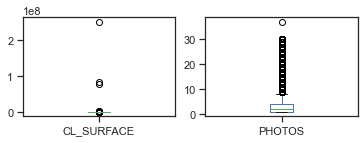

In [30]:
hcm_data.select_dtypes(np.number)[['CL_SURFACE','PHOTOS']].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

## Comment:

According to the box plots shown above, we can see that the variables do contain outliers. Therefore, we should apply median method in replacing NA values in these columns

### Replace NA with median in columns PHOTOS and  CL_SURFACE:

In [32]:
hcm_data['PHOTOS'] = hcm_data['PHOTOS'].replace(np.nan, hcm_data['PHOTOS'].median())
hcm_data['CL_SURFACE'] = hcm_data['CL_SURFACE'].replace(np.nan, hcm_data['CL_SURFACE'].median())
hcm_data

C:\Users\quocnam.pham\Anaconda3\envs\pymysql\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\quocnam.pham\Anaconda3\envs\pymysql\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,FOR_SALE,FOR_LEASE,LAND_TYPE,ADS_DATE,PRICE,PRICE_M2,SURFACE,USED_SURFACE,LEGAL_STATUS,PRO_DIRECTION,...,CL_SURFACE,CL_USED_SURFACE,CL_FULL_ADDRESS,CL_STREET,CL_WARD,CL_DISTRICT,CL_CITY,CHECK_CONVERT,PRO_FLAG,CREATED_DATE
1,0,1,thue-nha-mat-tien-pho,26/04/2020,22.0,0.305556,72.0,NaN,không xác định,không xác định,...,72.0,NaN,"phan văn trị, phường 10, quận gò vấp, tp.hcm",phan văn trị,phường 10,quận gò vấp,tphcm,2,12,None
2,0,1,thue-nha-mat-tien-pho,22/05/2018,35.0,0.134615,260.0,400.0,không xác định,tây,...,260.0,400.0,"lê thị riêng, phường thới an, quận 12, tp.hcm",lê thị riêng,phường thới an,quận 12,tphcm,2,12,None
4,0,1,thue-nha-hem-ngo,25/06/2018,15.0,0.187500,80.0,120.0,không xác định,đông,...,80.0,120.0,"đất mới, quận bình tân, tp.hcm",đất mới,None,None,tphcm,2,12,None
5,0,1,thue-nha-hem-ngo,01/06/2018,9.0,0.112500,80.0,NaN,không xác định,tây,...,80.0,NaN,"đường số 5, phường bình hưng hòa, quận bình tâ...",đường số 5,None,None,tphcm,2,12,None
6,0,1,thue-van-phong-nha-rieng-can-ho,01/06/2018,12.0,0.066667,180.0,180.0,không xác định,nam,...,180.0,180.0,"mã lò, quận bình tân, tp.hcm",mã lò,None,None,tphcm,2,12,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297948,0,1,thue-nha-biet-thu-lien-ke,27/09/2018,30.0,0.238095,126.0,400.0,không xác định,không xác định,...,126.0,400.0,"đường số 22, phường tân phong, quận 7, tp.hcm",đường số 22,phường tân phong,quận 7,tphcm,2,12,None
297950,0,1,thue-nha-mat-tien-pho,22/05/2018,45.0,0.405405,111.0,NaN,không xác định,không xác định,...,111.0,NaN,"bùi bằng đoàn, phường tân phong, quận 7, tp.hcm",bùi bằng đoàn,phường tân phong,quận 7,tphcm,2,12,None
297951,0,1,thue-can-ho-chung-cu,22/05/2018,23.0,0.174242,132.0,132.0,không xác định,không xác định,...,132.0,132.0,"hùng vương, quận 5, tp.hcm",hùng vương,None,None,tphcm,2,12,None
297952,0,1,thue-can-ho-chung-cu,22/05/2018,12.0,0.173913,69.0,69.0,không xác định,nam,...,69.0,69.0,"đường số 18, phường tân hưng, quận 7, tp.hcm",đường số 18,phường tân hưng,quận 7,tphcm,2,12,None


### Use Random Imputation for Dealing with NA of CL_USED_SURFACE

In [33]:
# Random imputation
def rand_imputation(data_df, feature):
    number_missing = data_df[feature].isnull().sum()
    observed_values = data_df.loc[data_df[feature].notnull(), feature]
    data_df.loc[data_df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace=True)
    return data_df

In [34]:
data_df = hcm_data
feature = 'CL_USED_SURFACE'
data_df[feature + '_imp'] = data_df[feature]
data_df = rand_imputation(data_df, feature)

C:\Users\quocnam.pham\Anaconda3\envs\pymysql\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\quocnam.pham\Anaconda3\envs\pymysql\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [35]:
hcm_data[feature] = data_df[feature + '_imp']
missing_values_table(hcm_data)

C:\Users\quocnam.pham\Anaconda3\envs\pymysql\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.



The Dataframe has 35 columns.
There are 15 columns that have missing values.


,Missing Values,% of Total Values
STREET,250124,100.0
CREATED_DATE,220440,88.1
USED_SURFACE,103073,41.2
LON,85589,34.2
LAT,85546,34.2
WARD,52413,21.0
CL_WARD,52413,21.0
DISTRICT,52401,21.0
CL_DISTRICT,52401,21.0
CL_STREET,28482,11.4


In [36]:
# Deterministic Regression Imputation
deter_df = pd.DataFrame(columns = ['Det ' + feature])
deter_df['Det ' + feature] = data_df[feature+ "_imp"]
parameters = ['CL_PRICE', 'PRICE_M2', 'CL_SURFACE', 'BEDROOM', 'BATHROOM']
model = linear_model.LinearRegression()
model.fit(X = data_df[parameters], y=data_df[feature + '_imp'])
deter_df.loc[data_df[feature].isnull(), 'Det '+ feature] = model.predict(data_df[parameters])[data_df[feature].isnull()]

## Cleaning NA for Categorical Variables

Since there are too little NA for CL_LEGAL_STATUS and CL_PRO_DIRECTION columns (only 0.5%), it's better to drop these rows.

The following list is of the remaining categorical columns with NA that will for certain be useful for models:
- CL_STREET
- CL_WARD
- CL_DISTRICT

# Define a function that fills in missing values of CL_STREET, CL_WARD, CL_DISTRICT with corresponding values from CL_FULL_ADDRESS

In [37]:
print(hcm_data[['CL_FULL_ADDRESS','CL_STREET','CL_WARD', 'CL_DISTRICT']])

                                          CL_FULL_ADDRESS      CL_STREET  \
1            phan văn trị, phường 10, quận gò vấp, tp.hcm   phan văn trị   
2           lê thị riêng, phường thới an, quận 12, tp.hcm   lê thị riêng   
4                          đất mới, quận bình tân, tp.hcm        đất mới   
5       đường số 5, phường bình hưng hòa, quận bình tâ...     đường số 5   
6                            mã lò, quận bình tân, tp.hcm          mã lò   
...                                                   ...            ...   
297948      đường số 22, phường tân phong, quận 7, tp.hcm    đường số 22   
297950    bùi bằng đoàn, phường tân phong, quận 7, tp.hcm  bùi bằng đoàn   
297951                         hùng vương, quận 5, tp.hcm     hùng vương   
297952       đường số 18, phường tân hưng, quận 7, tp.hcm    đường số 18   
297953  lê trọng tấn, phường tây thạnh, quận tân phú, ...   lê trọng tấn   

                 CL_WARD   CL_DISTRICT  
1              phường 10   quận gò vấp  
2    

In [38]:
def fill_na_address(input_path):
    # TODO:- read input
    hcm_data = pd.DataFrame(input_path)
    # TODO:- patterns
    dist1_p = re.compile(u'(quận .*), .*')
    dist2_p = re.compile(u'(huyện .*), .*')

    ward1_p = re.compile(u'(phường .*), (quận|huyện)')
    ward2_p = re.compile(u'(xã .*), huyện')

    street1_p = re.compile(u'(.*), (xã|quận|thị trấn|huyện) .*')

    hcm_data.fillna({'CL_DISTRICT': 'NULL', 'CL_WARD': 'NULL',
                    'CL_STREET': 'NULL'}, inplace=True)

    # TODO:- test function
    hcm_data['CL_DISTRICT'] = hcm_data.apply(
        lambda row: (
            dist1_p.search(row['CL_FULL_ADDRESS']).group(1) if dist1_p.search(row['CL_FULL_ADDRESS']) else
            dist2_p.search(row['CL_FULL_ADDRESS']).group(
                1) if dist2_p.search(row['CL_FULL_ADDRESS']) else "MISSING"
        )
        if row['CL_DISTRICT'] == 'NULL' else row['CL_DISTRICT'],
        axis=1
    )
    hcm_data['CL_WARD'] = hcm_data.apply(
        lambda row: (
            ward1_p.search(row['CL_FULL_ADDRESS']).group(1) if ward1_p.search(row['CL_FULL_ADDRESS']) else
            ward2_p.search(row['CL_FULL_ADDRESS']).group(
                1) if ward2_p.search(row['CL_FULL_ADDRESS']) else "MISSING"
        ) if row['CL_WARD'] == 'NULL' else row['CL_WARD'],
        axis=1
    )
    hcm_data['CL_STREET'] = hcm_data.apply(
        lambda row: (street1_p.search(row['CL_FULL_ADDRESS']).group(1) if street1_p.search(
            row['CL_FULL_ADDRESS']) else "MISSING") if row['STREET'] == 'NULL' else row['CL_STREET'],
        axis=1
    )
    
    return hcm_data

In [39]:
#Fill in missing values of CL_STREET, CL_WARD, CL_DISTRICT with corresponding values from CL_FULL_ADDRESS
fill_na_address(hcm_data)

,FOR_SALE,FOR_LEASE,LAND_TYPE,ADS_DATE,PRICE,PRICE_M2,SURFACE,USED_SURFACE,LEGAL_STATUS,PRO_DIRECTION,...,CL_USED_SURFACE,CL_FULL_ADDRESS,CL_STREET,CL_WARD,CL_DISTRICT,CL_CITY,CHECK_CONVERT,PRO_FLAG,CREATED_DATE,CL_USED_SURFACE_imp
1,0,1,thue-nha-mat-tien-pho,26/04/2020,22.0,0.305556,72.0,NaN,không xác định,không xác định,...,16.0,"phan văn trị, phường 10, quận gò vấp, tp.hcm",phan văn trị,phường 10,quận gò vấp,tphcm,2,12,None,16.0
2,0,1,thue-nha-mat-tien-pho,22/05/2018,35.0,0.134615,260.0,400.0,không xác định,tây,...,400.0,"lê thị riêng, phường thới an, quận 12, tp.hcm",lê thị riêng,phường thới an,quận 12,tphcm,2,12,None,400.0
4,0,1,thue-nha-hem-ngo,25/06/2018,15.0,0.187500,80.0,120.0,không xác định,đông,...,120.0,"đất mới, quận bình tân, tp.hcm",đất mới,MISSING,quận bình tân,tphcm,2,12,None,120.0
5,0,1,thue-nha-hem-ngo,01/06/2018,9.0,0.112500,80.0,NaN,không xác định,tây,...,30.0,"đường số 5, phường bình hưng hòa, quận bình tâ...",đường số 5,phường bình hưng hòa,quận bình tân,tphcm,2,12,None,30.0
6,0,1,thue-van-phong-nha-rieng-can-ho,01/06/2018,12.0,0.066667,180.0,180.0,không xác định,nam,...,180.0,"mã lò, quận bình tân, tp.hcm",mã lò,MISSING,quận bình tân,tphcm,2,12,None,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297948,0,1,thue-nha-biet-thu-lien-ke,27/09/2018,30.0,0.238095,126.0,400.0,không xác định,không xác định,...,400.0,"đường số 22, phường tân phong, quận 7, tp.hcm",đường số 22,phường tân phong,quận 7,tphcm,2,12,None,400.0
297950,0,1,thue-nha-mat-tien-pho,22/05/2018,45.0,0.405405,111.0,NaN,không xác định,không xác định,...,1000.0,"bùi bằng đoàn, phường tân phong, quận 7, tp.hcm",bùi bằng đoàn,phường tân phong,quận 7,tphcm,2,12,None,1000.0
297951,0,1,thue-can-ho-chung-cu,22/05/2018,23.0,0.174242,132.0,132.0,không xác định,không xác định,...,132.0,"hùng vương, quận 5, tp.hcm",hùng vương,MISSING,quận 5,tphcm,2,12,None,132.0
297952,0,1,thue-can-ho-chung-cu,22/05/2018,12.0,0.173913,69.0,69.0,không xác định,nam,...,69.0,"đường số 18, phường tân hưng, quận 7, tp.hcm",đường số 18,phường tân hưng,quận 7,tphcm,2,12,None,69.0


# Splitting the data set into two subsets regarding FOR SALE and FOR LEASE

In [41]:
hcm_sale = hcm_data[hcm_data['FOR_SALE'] == 1]

In [42]:
hcm_lease = hcm_data[hcm_data['FOR_LEASE'] == 1]

## Comment

For the purposes of this project particularly, we will only focus on the property for sale.

# We will continue working on the sale dataset in Part 2